In [338]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [339]:
#reading datasets
df=pd.read_csv("F:\Assignment\Csv\loan-predictionUC.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [270]:
df.shape

(614, 13)

In [271]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [273]:
# we need to replace all zero with nan values in numerical columns if required but here not required
#df.loc[:,['columns name']]=df.loc[:,['columns name']].replace(0,np.NaN)
#Check the  percentage of null values
print(df.isnull().mean()*100)
#Here we can see that no column has more than 10% null vakue.So i have to fill it.
#Dropping if the columns have more than 40% null values
#col_dropped = df.loc[:, df.isnull().mean() < .4]
# Dropping the rows having more than 40% null values
#row_dropped = df.loc[df.isnull().mean(axis=1) < .4, :]"""


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [274]:
df.nunique()
df['Property_Area'].value_counts()

Semiurban     220
Urban         202
Rural         179
semiurban       7
Semi-urban      6
Name: Property_Area, dtype: int64

In [340]:
#Select the fearures with same dtypes
listobj=df.select_dtypes(include='object').columns
print(listobj)
listnum=list(df.select_dtypes(exclude='object').columns)
print(listnum)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [341]:
#fill the missing values using mean of numerical columns:mean
#fill the missing value for categorical term: mode
""""df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
#df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
#df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
#df['LoanAmount'].isnull().sum()
#fill the missing value for categorical term: mode
#df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0]) #mode returns array so use mode()[0]
#df['Married']=df['Married'].fillna(df['Married'].mode()[0])
#df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])"""
def fill_(df):
    for col in listobj:
        df[col]=df[col].fillna(df[col].mode()[0])
    for col in listnum:
        df[col]=df[col].fillna(df[col].mean())
fill_(df)
print(df.isnull().sum())
# we  can use SimpleImputer and KNNimputer to fill the missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [342]:
print(df['Dependents'].unique())
df['Dependents']=df['Dependents'].replace(to_replace=['0' ,'1', '2','3+'],value=[0,1,2,3],inplace=False)
print(df['Dependents'].unique())

['0' '1' '2' '3+']
[0 1 2 3]


In [278]:
#pairplot ,scatterplot


# Handling Outliers

(614, 13)


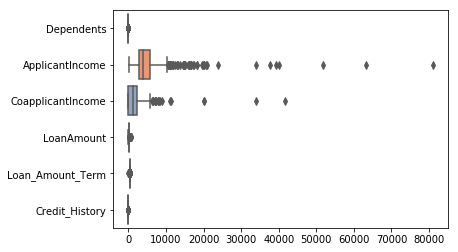

In [343]:
# Check for outliers using Boxplot
fig, axes = plt.subplots()
sns.boxplot(data=df,orient='h', palette="Set2")
print(df.shape)

In [280]:
#Here we can see that ApplicantIncome and Coapplicantincome contains outliers
#So we have to remove outliers
#Getting the 1st and 3rd quartle of columns
q75,q25=np.percentile(df['ApplicantIncome'],[75,25])
q_75,q_25=np.percentile(df['CoapplicantIncome'],[75,25])

print(q75,q25)

print(q_75,q_25)

5795.0 2877.5
2297.25 0.0


In [281]:
# Calculating IQR
iqr=q75-q25
iqr_=q_75-q_25
print(iqr,iqr_)
whisker=q75+(1.5*iqr)
whisker_=q_75+(1.5*iqr_)
print(whisker,whisker_)

2917.5 2297.25
10171.25 5743.125


(614, 13)


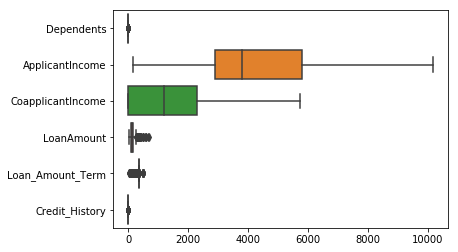

In [282]:
#Capping the outliers to the upperwhisker value
df['ApplicantIncome']=df['ApplicantIncome'].clip(upper=whisker)
df['CoapplicantIncome']=df['CoapplicantIncome'].clip(upper=whisker_)
sns.boxplot(data=df,orient='h')
print(df.shape)


# Visulization of Categorical Features

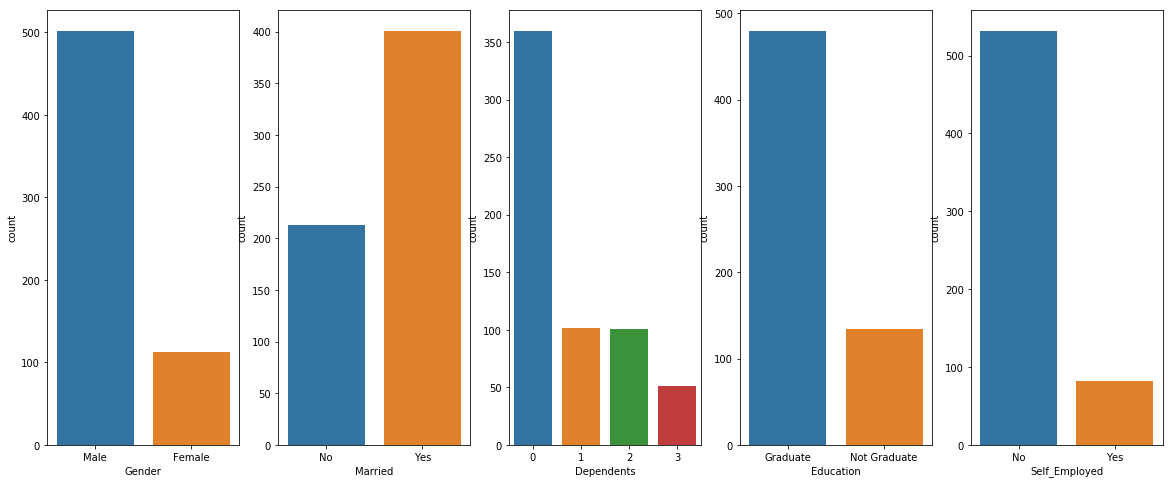

In [283]:
plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
sns.countplot(df['Gender'])
#Here we can see that more male present as compared to female
plt.subplot(1,5,2)
sns.countplot(df['Married'])
#Most of the people are married here
plt.subplot(1,5,3)
sns.countplot(df['Dependents'])
# Most people are independent but some are dependent on 1 or 2 or 3 person

plt.subplot(1,5,4)
sns.countplot(df['Education'])
#Most people are graduated
plt.subplot(1,5,5)
sns.countplot(df['Self_Employed'])

#Here we can see that more male present as compared to female

['Urban' 'Rural' 'Semiurban' 'Semi-urban' 'semiurban']
Semiurban     220
Urban         202
Rural         179
semiurban       7
Semi-urban      6
Name: Property_Area, dtype: int64


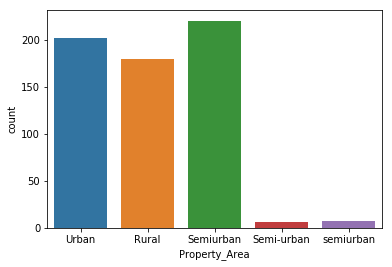

In [284]:
sns.countplot(df['Property_Area'])
# here we can see that three columns has same name so we have to combine these three into one
print(df['Property_Area'].unique())
print(df['Property_Area'].value_counts())

['Urban' 'Rural' 'Semiurban']
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


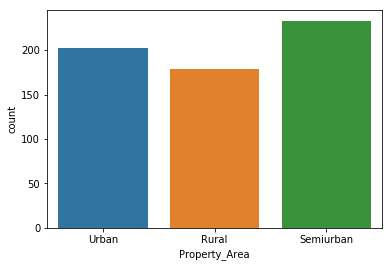

In [344]:
#Combining the columns with same name
df['Property_Area']=df['Property_Area'].replace(to_replace=['Semi-urban','semiurban'],value=['Semiurban','Semiurban'],inplace=False)
print(df['Property_Area'].unique())
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'])

# Numerical Attribute Visualization

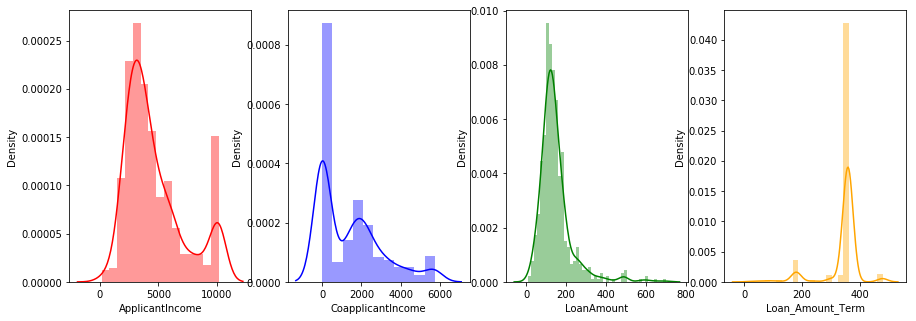

In [286]:
plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.distplot(df['ApplicantIncome'],color='red')

plt.subplot(1,4,2)
sns.distplot(df['CoapplicantIncome'],color='blue')

plt.subplot(1,4,3)
sns.distplot(df['LoanAmount'],color='green')

plt.subplot(1,4,4)
sns.distplot(df['Loan_Amount_Term'],color='orange')

# Here we need to normalize these numerical Features

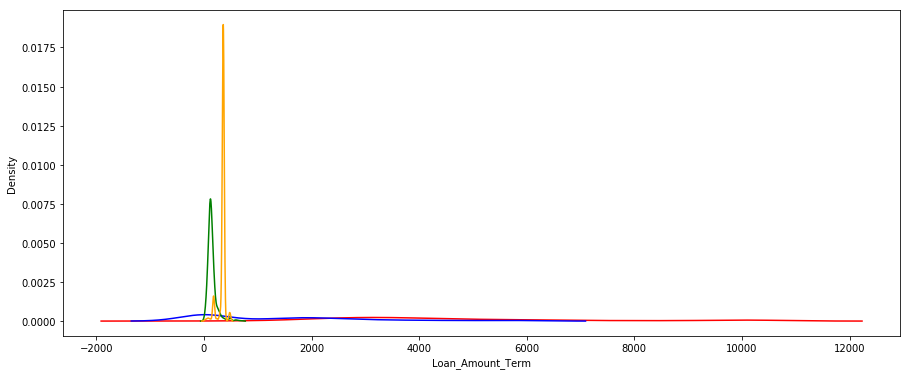

In [287]:
# Doing Above thing in one graph
plt.figure(figsize=(15,6))
sns.distplot(df['ApplicantIncome'],color='red',hist=False)
sns.distplot(df['CoapplicantIncome'],color='blue',hist=False)
sns.distplot(df['LoanAmount'],color='green',hist=False)
sns.distplot(df['Loan_Amount_Term'],color='orange',hist=False)
#Here we need to normalize these features


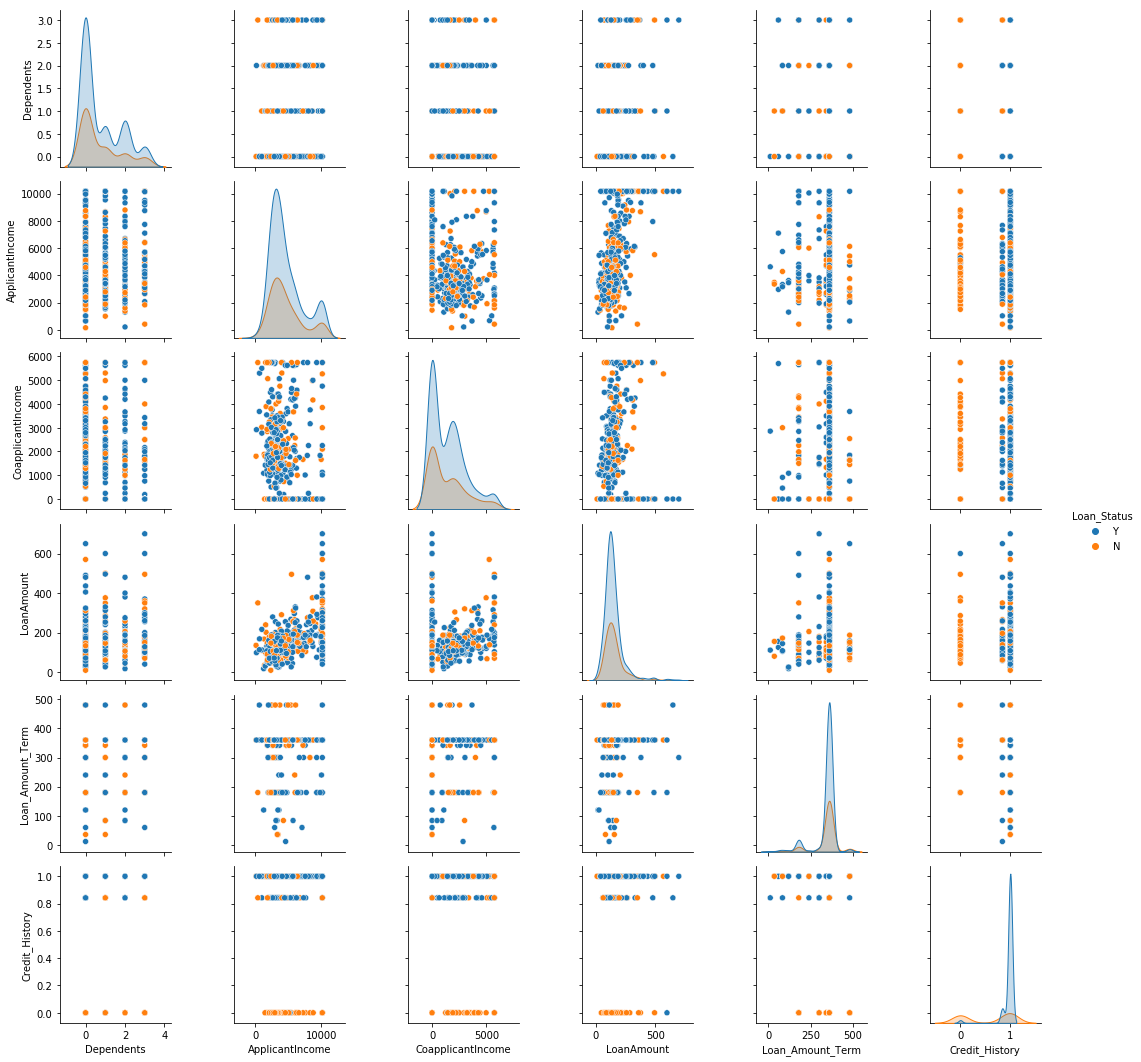

In [288]:
# Finding the relashionship between variables using pairplot
sns.pairplot(data=df,hue='Loan_Status')

# Correlation matrix


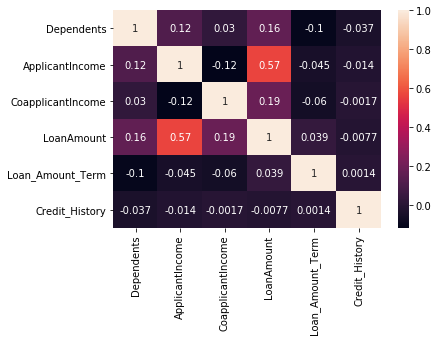

In [345]:
corr=df.corr()
sns.heatmap(corr,annot=True)
df=df.drop(columns=['Loan_ID'],axis=1,inplace=False)

# OneHot Encoding using Pandas

In [346]:

cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
df1=pd.get_dummies(df[cols],drop_first=True)
df=pd.concat([df,df1],axis=1)
df=df.drop(df[cols],axis=1)
print(df.shape)
print(df1.shape)




(614, 12)
(614, 8)


In [348]:
df.head(22)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.000000,1,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.000000,1,1,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.000000,1,1,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.000000,1,1,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.000000,1,0,0,0,0,1,1
5,5417,4196.0,267.000000,360.0,1.000000,1,1,0,1,0,1,1
6,2333,1516.0,95.000000,360.0,1.000000,1,1,1,0,0,1,1
7,3036,2504.0,158.000000,360.0,0.000000,1,1,0,0,1,0,0
8,4006,1526.0,168.000000,360.0,1.000000,1,1,0,0,0,1,1
9,12841,10968.0,349.000000,360.0,1.000000,1,1,0,0,1,0,0


# Normalization of Numerical features

In [349]:
#Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
b=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[b]=MinMaxScaler().fit_transform(df[b])

df.head()
# we can also standrize the features
# Standrize the dataset
#from sklearn.preprocessing import StandardScaler
#a=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
#ss=StandardScaler()
#df[a]=ss.fit_transform(df[a])

#print(df.shape)

#df.head(

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.070489,0.000000,0.198860,0.74359,1.0,1,0,0,0,0,1,1
1,0.054830,0.036192,0.172214,0.74359,1.0,1,1,0,0,0,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,1,1,0,1,0,1,1
3,0.030093,0.056592,0.160637,0.74359,1.0,1,1,1,0,0,1,1
4,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,1,1


# Train-Test Split

In [352]:
#Specify input and output attributes
x=df.drop(columns=['Loan_Status_Y'],axis=1)
y=df['Loan_Status_Y']


# Checking for imbalanced Dataset

1    422
0    192
Name: Loan_Status_Y, dtype: int64


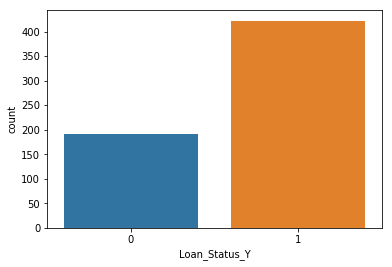

In [353]:
#we need to check for imbalanced data(Medical Case,froadland dataset) because most algorithm are biased towards imbalanced data 
#If we found imbalanced data then we need to do upsampling or undersampling(done only if we have huge records) to balance it.
# we use imblearn library
print(df['Loan_Status_Y'].value_counts())
sns.countplot(df['Loan_Status_Y'])
# This is highly imbalanced dataset

In [354]:
#Implement undersampling for handling imbalanced
from imblearn.under_sampling import NearMiss
nm=NearMiss()
x_,y_=nm.fit_sample(x,y)
print(x_.shape,y_.shape)
from collections import Counter
print('Original datasets shape {}'.format(Counter(y)))
print('After undersampling datasets shape {}'.format(Counter(y_)))

(384, 11) (384,)
Original datasets shape Counter({1: 422, 0: 192})
After undersampling datasets shape Counter({0: 192, 1: 192})


In [355]:
#Implementing upsampling for handling imbalanced
from imblearn.combine import SMOTETomek # Combination of upsampling and downsampling
smk=SMOTETomek(random_state=42)
x1,y1=smk.fit_sample(x,y)
print(x1.shape,y1.shape)
from collections import Counter
print('Original datasets shape {}'.format(Counter(y)))
print('After undersampling datasets shape {}'.format(Counter(y1)))
# Anotherway of implementing upsampling
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
x2,y2=os.fit_sample(x,y)
print(x2.shape,y2.shape)
print('Original datasets shape {}'.format(Counter(y)))
print('After undersampling datasets shape {}'.format(Counter(y2)))

(760, 11) (760,)
Original datasets shape Counter({1: 422, 0: 192})
After undersampling datasets shape Counter({1: 380, 0: 380})
(844, 11) (844,)
Original datasets shape Counter({1: 422, 0: 192})
After undersampling datasets shape Counter({1: 422, 0: 422})


In [368]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.2,random_state=42)
df.isnull().sum()


ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

# Model Trainning

## Logistic regression

In [437]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=10,penalty='l2')
clf.fit(x_train,y_train)
#x_train.dtypes

LogisticRegression(C=10)

In [438]:
predict=clf.predict(x_test)
print(clf.score(x_train,y_train),clf.score(x_test,y_test))

0.7483552631578947 0.7368421052631579


In [599]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[47 29]
 [11 65]]
              precision    recall  f1-score   support

           0       0.81      0.62      0.70        76
           1       0.69      0.86      0.76        76

    accuracy                           0.74       152
   macro avg       0.75      0.74      0.73       152
weighted avg       0.75      0.74      0.73       152



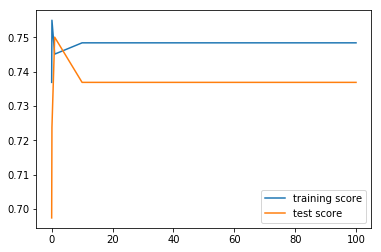

In [372]:
#Trying different values of C
c = [0.01,0.1,1,10,100]
test_score=[]
train_score=[]
for i in c:
    clf = LogisticRegression(C=i)
    clf.fit(x_train,y_train)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(c, train_score, label="training score")
plt.plot(c, test_score, label="test score")
#plt.xscale('log')
plt.legend()

In [373]:
print(test_score,train_score)

[0.6973684210526315, 0.7236842105263158, 0.75, 0.7368421052631579, 0.7368421052631579] [0.7368421052631579, 0.7549342105263158, 0.7450657894736842, 0.7483552631578947, 0.7483552631578947]


# Hyperparameter Tunning Using RandomizedSearch

In [434]:
from sklearn.model_selection import RandomizedSearchCV
params={"C":[0.001,0.01,1,10,100,1000],"penalty":['l1', 'l2', 'elasticnet', 'none'],}
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5)
random_search.fit(x1,y1)
random_search.best_estimator_,random_search.best_params_

(LogisticRegression(C=0.01), {'penalty': 'l2', 'C': 0.01})

# KNN Classifier

In [374]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics


In [460]:
# Here we can tune hyperparameter k,p=[1,2],leaf_size=range(1,50)
k_range = range(1,20)
scores = {}
scores_list = []
error = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    error.append(np.mean(y_pred != y_test))


In [461]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52 24]
 [13 63]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74        76
           1       0.72      0.83      0.77        76

    accuracy                           0.76       152
   macro avg       0.76      0.76      0.76       152
weighted avg       0.76      0.76      0.76       152



# KNN Hyperparameter Tunning

In [485]:
params={"n_neighbors":list(range(1,25)),"p":[1,2],"leaf_size":list(range(1,50))}
random_search=RandomizedSearchCV(knn,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5)
random_search.fit(x1,y1)
random_search.best_estimator_,random_search.best_params_

(KNeighborsClassifier(leaf_size=33, n_neighbors=8),
 {'p': 2, 'n_neighbors': 8, 'leaf_size': 33})

In [486]:
knn = KNeighborsClassifier(n_neighbors=8,leaf_size=33,p=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_train,y_train),knn.score(x_test,y_test)


(0.8174342105263158, 0.8157894736842105)

In [601]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[68  8]
 [20 56]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        76
           1       0.88      0.74      0.80        76

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.81       152
weighted avg       0.82      0.82      0.81       152



# Decision Tree

In [377]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 50)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

In [386]:
print(f'model Accuracy : {dtree.score(x_train, y_train)}')
predictions = dtree.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
#print(dtree.score(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

model Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        76
           1       0.85      0.80      0.82        76

    accuracy                           0.83       152
   macro avg       0.83      0.83      0.83       152
weighted avg       0.83      0.83      0.83       152

[[65 11]
 [15 61]]
0.8289473684210527


# DecisionTree Hyperparameter Tunning

In [517]:

params={"max_depth":[3,4,5,6,7,8,11,13,15,20],"max_leaf_nodes":[5,6,7,9,12,15,16],
              "max_features": [1,2,3,4,6,7,8,9],
              "min_samples_leaf": [1,3,4,5,7,8,9],
              "criterion": ["gini", "entropy"]}
random_search=RandomizedSearchCV(dtree,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5)
random_search.fit(x1,y1)
random_search.best_estimator_,random_search.best_params_

(DecisionTreeClassifier(max_depth=13, max_features=9, max_leaf_nodes=15,
                        random_state=50),
 {'min_samples_leaf': 1,
  'max_leaf_nodes': 15,
  'max_features': 9,
  'max_depth': 13,
  'criterion': 'gini'})

In [539]:
dtree = DecisionTreeClassifier(max_depth=13, max_features=9, max_leaf_nodes=15,
                        random_state=50)
dtree.fit(x_train, y_train)
print(f'model Accuracy : {dtree.score(x_train, y_train)}')
predictions = dtree.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
#print(dtree.score(y_test,predictions))
print("Test accuracy: ",metrics.accuracy_score(y_test,predictions))

model Accuracy : 0.805921052631579
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        76
           1       0.75      0.86      0.80        76

    accuracy                           0.78       152
   macro avg       0.79      0.78      0.78       152
weighted avg       0.79      0.78      0.78       152

[[54 22]
 [11 65]]
Test accuracy:  0.7828947368421053


In [540]:
# Checking the number of nodes in the decision tree model
dtree.tree_.node_count

29

In [522]:
# Importing the metrics to evaluate the model.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [533]:
# Taking out False Positive Rate and True Positive rate to get the ROC graph
probs = dtree.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds)
dt_roc_auc = metrics.auc(fpr, tpr)

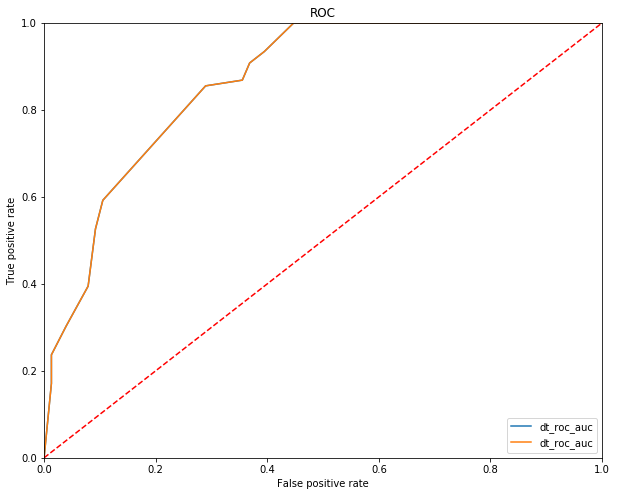

In [535]:
# Plotting the FPR and TPR to do ROC Analysis
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='dt_roc_auc')
plt.plot(fpr1, tpr1, label='dt_roc_auc')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

In [538]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
preds = dtree.predict(x_test)
print('Accuracy Score:' + str(accuracy_score(y_test, preds)))
print('precision Score:' + str(precision_score(y_test, preds)))
print('recall Score:' + str(recall_score(y_test, preds)))
print('F1 Score:' + str(f1_score(y_test, preds)))


Accuracy Score:0.7828947368421053
precision Score:0.7471264367816092
recall Score:0.8552631578947368
F1 Score:0.7975460122699386


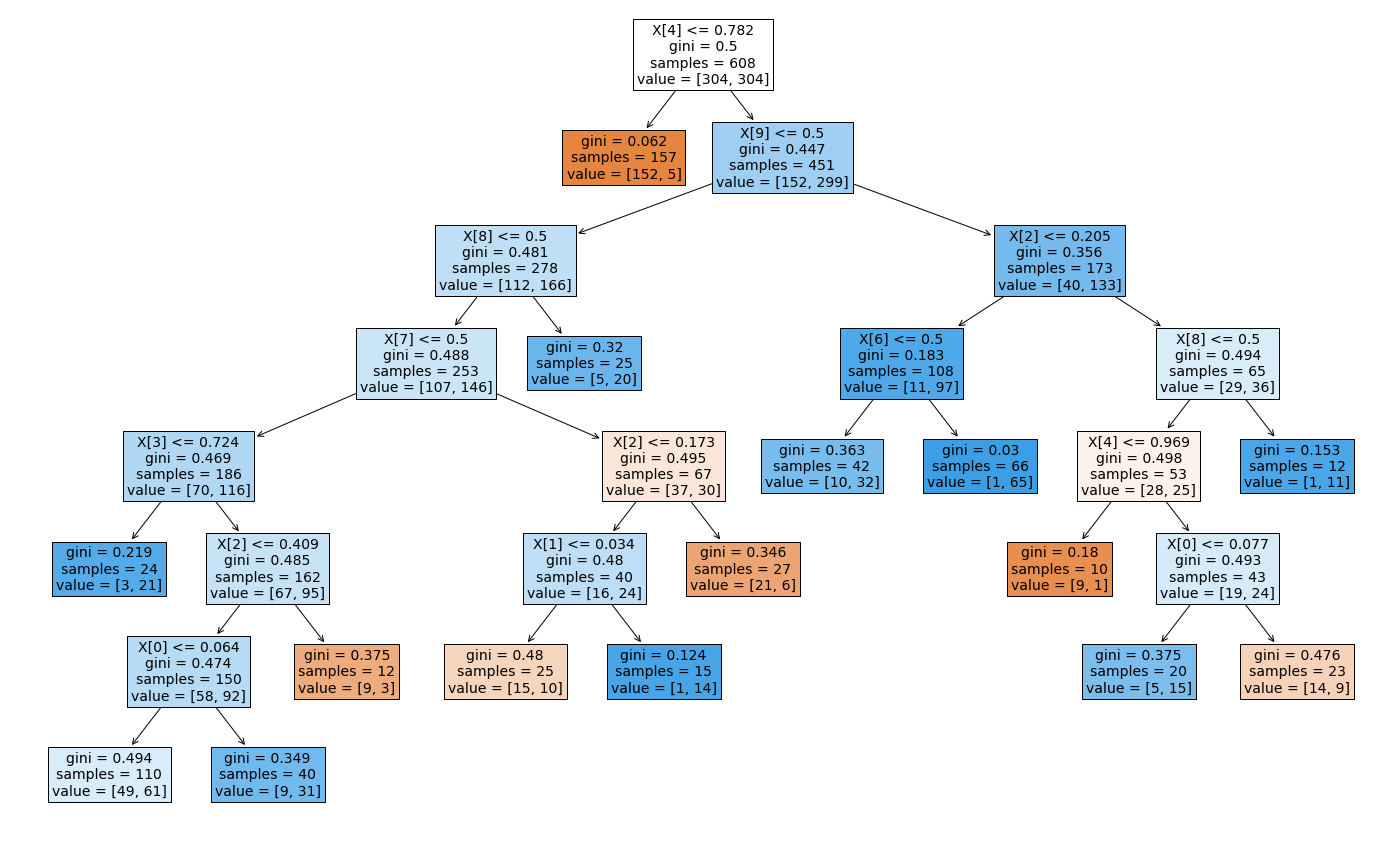

In [602]:
#Visualising Tree
from sklearn import tree
plt.figure(figsize=(24,15))
tree.plot_tree(dtree,filled=True,fontsize=14)
fig.savefig('imagename.png')


# Random_Forest

In [571]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

# Hyperparameter Tunning

In [572]:
from random import random
param_dist = {'n_estimators': np.linspace(10, 400).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features' : ['auto','sqrt',None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes' : [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap' : [True, False]}
random_search=RandomizedSearchCV(rf,param_distributions=param_dist,n_iter=10)
random_search.fit(x_train,y_train)
print(random_search.best_params_,random_search.best_estimator_)
print("hi")



{'n_estimators': 224, 'min_samples_split': 10, 'max_leaf_nodes': 34, 'max_features': 0.7999999999999999, 'max_depth': 8, 'bootstrap': True} RandomForestClassifier(max_depth=8, max_features=0.7999999999999999,
                       max_leaf_nodes=34, min_samples_split=10,
                       n_estimators=224, random_state=42)
hi


In [585]:
rf1= RandomForestClassifier(max_depth=8, max_features=10,
                       max_leaf_nodes=34, min_samples_split=9,
                       n_estimators=224, random_state=42)
rf1.fit(x_train,y_train)
print(f'model Accuracy : {rf1.score(x_train, y_train)}')
predictions = rf1.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
#print(dtree.score(y_test,predictions))
print("Test accuracy: ",metrics.accuracy_score(y_test,predictions))

model Accuracy : 0.9391447368421053
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        76
           1       0.84      0.93      0.88        76

    accuracy                           0.88       152
   macro avg       0.88      0.88      0.87       152
weighted avg       0.88      0.88      0.87       152

[[62 14]
 [ 5 71]]
Test accuracy:  0.875


In [588]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
preds = rf1.predict(x_test)
print('Accuracy Score:' + str(accuracy_score(y_test, preds)))
print('precision Score:' + str(precision_score(y_test, preds)))
print('recall Score:' + str(recall_score(y_test, preds)))
print('F1 Score:' + str(f1_score(y_test, preds)))

Accuracy Score:0.875
precision Score:0.8352941176470589
recall Score:0.9342105263157895
F1 Score:0.8819875776397516


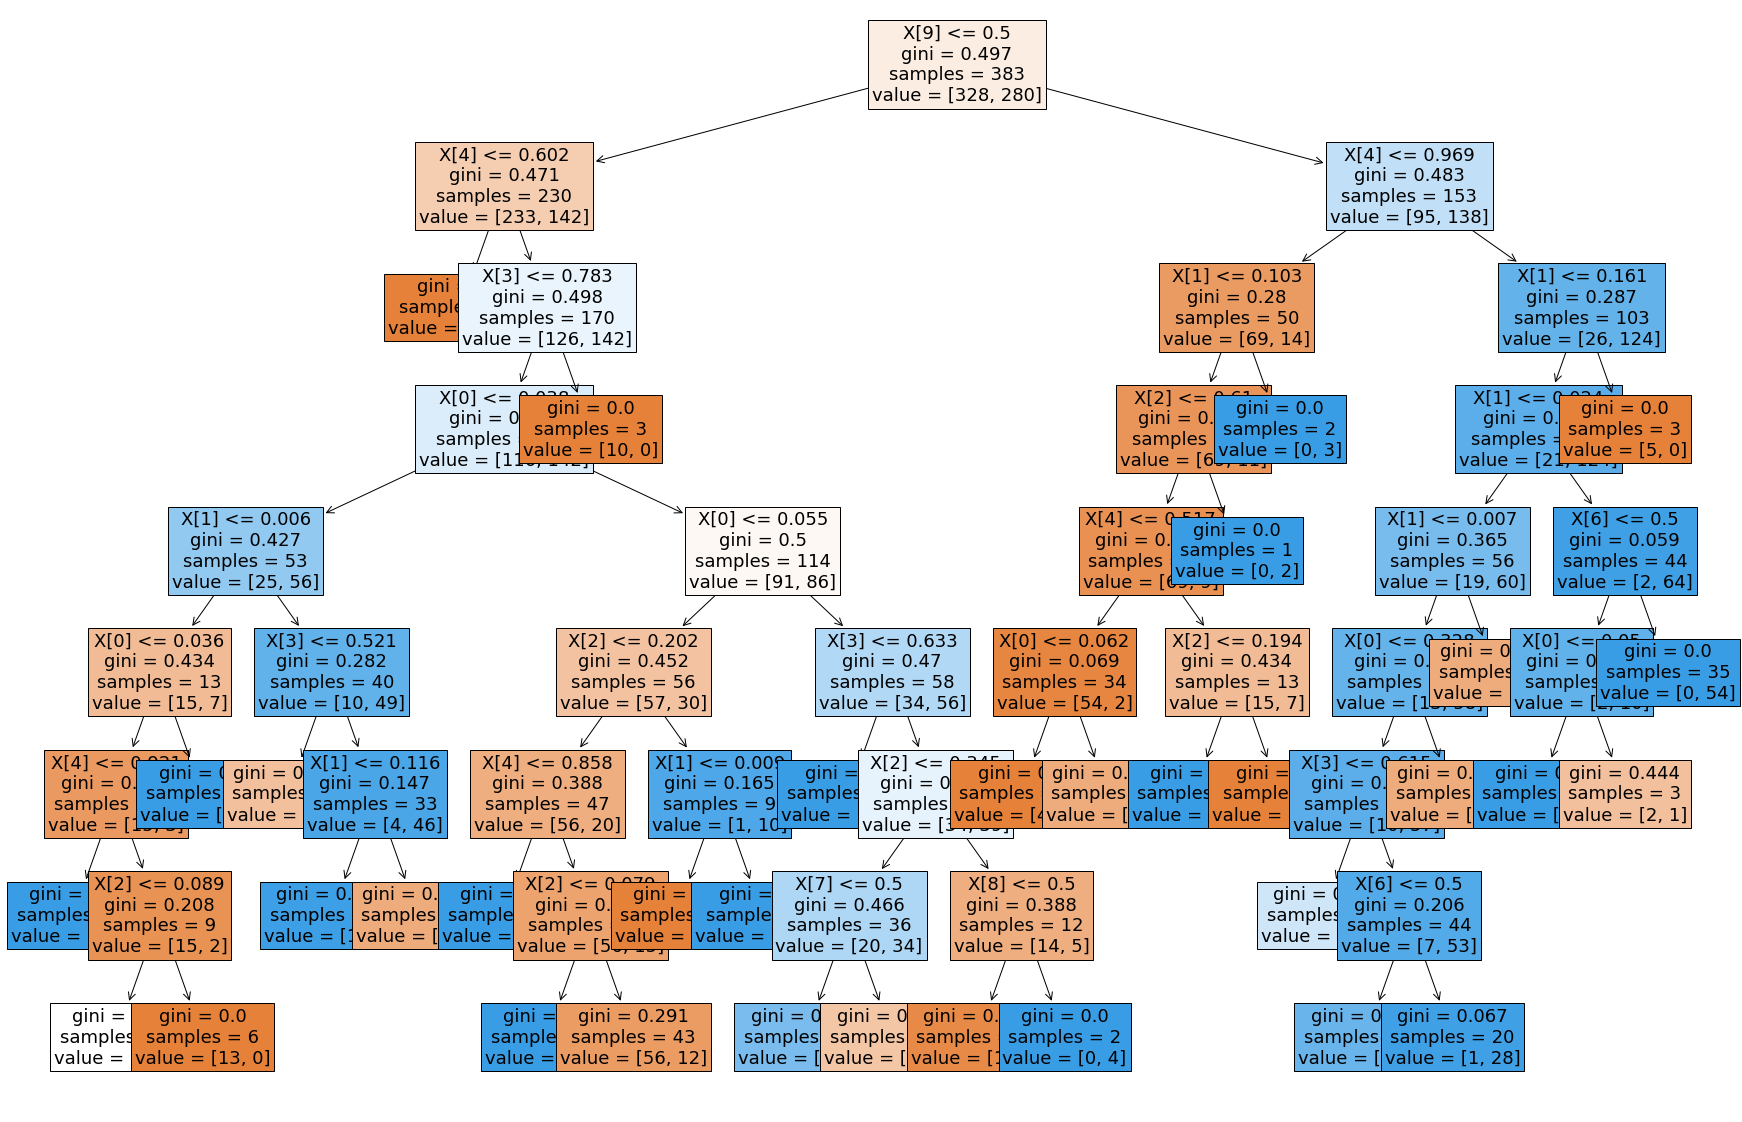

In [597]:
#Visualising Tree
from sklearn import tree
rf2=rf1.estimators_[1]
plt.figure(figsize=(30,20))
tree.plot_tree(rf2,filled=True,fontsize=18)
#tree.export_graphviz(rf2,filled=True)
fig.savefig('imagename.png')